# Hyperparameter Tunning

In [2]:
import os
import pandas as pd

In [3]:
def data_reader(data_path):
    # Reading train and test data
    train_df = pd.read_csv(os.path.join(data_path, "train.csv"))
    test_df  = pd.read_csv(os.path.join(data_path, "test.csv"))
    
    # Spliting features and target
    train_target = train_df.target
    train_features = train_df.drop(columns=['ID_code', 'target'])
    test_idcode = test_df.ID_code
    test_features = test_df.drop(columns=['ID_code'])
    
    return train_features, train_target, test_features, test_idcode

In [4]:
data_path = "../Data"

train_features, train_target, test_features, test_idcode = data_reader(data_path)
print(train_features.shape, train_target.shape, test_features.shape)

(200000, 200) (200000,) (200000, 200)


# Building tunning model

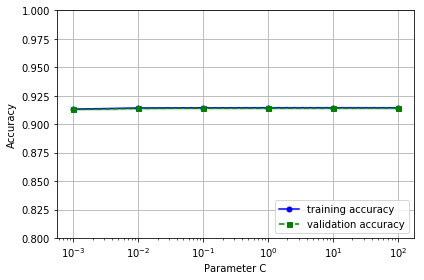

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import validation_curve

pipe_lr = make_pipeline(LogisticRegression(penalty='l2', random_state=1))

param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
                estimator=pipe_lr,
                X=train_features, 
                y=train_target, 
                param_name='logisticregression__C', 
                param_range=param_range,
                cv=10,
                n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()
# plt.savefig('images/06_06.png', dpi=300)
plt.show()